In [31]:
#Importing all the libraries that I use in this project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [32]:
#Loding data into the kernels
file_path_with_infertility="PCOS_infertility.csv"
file_path_without_infertility="PCOS_data_without_infertility.xlsx"
PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

In [33]:
#Merging the two files as per patient file no.
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')
data

C:\Users\91868\AppData\Local\Temp\ipykernel_19508\3745080842.py:3: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_y,PCOS (Y/N)_y,I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y,AMH(ng/mL)_y
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,3,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,5,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,15,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,2,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,4,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0,17.5,10.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,7,19.0,18.0,8.2,NaN,NaN,NaN,NaN,NaN,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0,18.0,9.0,7.3,NaN,NaN,NaN,NaN,NaN,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,6,18.0,16.0,11.5,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

In [35]:
#Taking a look at the dataset
data


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [37]:
#Encoding categorical variables (dtype objects)
#Having a look at the data with dtype objects
data["AMH(ng/mL)"].head()


0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [38]:
#Similarly
data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [39]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')


In [40]:
#Dealing with missing values.
#Filling NA values with the median of that feature.
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

In [41]:
#Clearing up the extra space in the column names (optional)
data.columns = [col.strip() for col in data.columns]

In [42]:
#Exploaratory Data Analysis
# Having a look at some basic statistical details.
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [43]:
#Added in the recent update.
#Dropping the outliers.
data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["AMH(ng/mL)"]<40)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["Endometrium (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["RBS(mg/dl)"]<200)]
data = data[(data["PRG(ng/mL)"]<20)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["FSH(mIU/mL)"]<4000)]
data = data[(data["LH(mIU/mL)"]<1500)]
data = data[(data["Cycle(R/I)"]<4.5)]
data.shape


(526, 44)

In [44]:
data.columns


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [45]:
from sklearn.decomposition import PCA
pca=PCA(22)

In [46]:
z=data[['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']]

In [47]:
pca.fit(z)

PCA(n_components=22)

In [48]:
pca.components_

array([[-8.82075469e-04, -8.82075469e-04, -3.26948921e-06,
         2.01232152e-05,  4.98655975e-05,  1.14293834e-04,
        -1.38117537e-05, -1.93546991e-05, -3.93558528e-05,
        -4.09154669e-05, -6.74907628e-06,  1.59190305e-05,
         8.80993255e-06,  1.64062950e-04,  2.22071633e-05,
         1.20543415e-05,  9.57450606e-01,  2.88591323e-01,
        -8.69633610e-05, -4.67218354e-05,  9.92130086e-05,
         1.82606980e-05,  7.42396578e-06, -2.62986650e-07,
        -5.16471070e-05,  2.83859058e-05, -6.13125885e-05,
        -1.30352146e-03,  1.55060787e-06, -8.70710135e-05,
        -7.62894632e-06,  2.88826800e-06,  6.36716990e-06,
         6.34979416e-06, -2.17243653e-06,  2.85914163e-06,
         4.18220107e-06, -1.87266505e-04, -1.93355133e-06,
         6.39717760e-05,  2.77726096e-05,  4.63600856e-05,
         6.68561983e-05, -3.03660927e-05],
       [-3.88681703e-03, -3.88681703e-03,  1.31471631e-05,
         1.85686402e-04, -1.04592857e-04, -1.80101019e-05,
        -3.17

In [49]:
x=pca.transform(z)

In [50]:
x

array([[-7.17381185e+02, -3.21423155e+01, -1.94071095e+01, ...,
         5.44650956e+00, -1.34378396e+00,  7.37480257e-01],
       [-6.61129789e+02, -4.91162166e+01,  2.48138590e+01, ...,
         7.18942994e-01,  4.54226169e-01, -4.21597598e+00],
       [-1.04255830e+02,  2.96975830e+02,  1.37337405e+01, ...,
        -2.28159925e+00,  1.91969027e+00,  1.95336105e+00],
       ...,
       [-7.18340523e+02, -3.63184812e+01, -4.37496174e+01, ...,
         1.03343691e+00, -5.61337248e+00, -1.76420495e+00],
       [-4.39789978e+02, -1.20290123e+02, -4.34510722e+01, ...,
         6.24592035e-01, -1.88797033e+00,  2.68333516e+00],
       [-7.18331928e+02, -3.63450591e+01, -4.88631240e+01, ...,
         6.09615019e+00, -2.61745287e-01, -1.88999057e+00]])

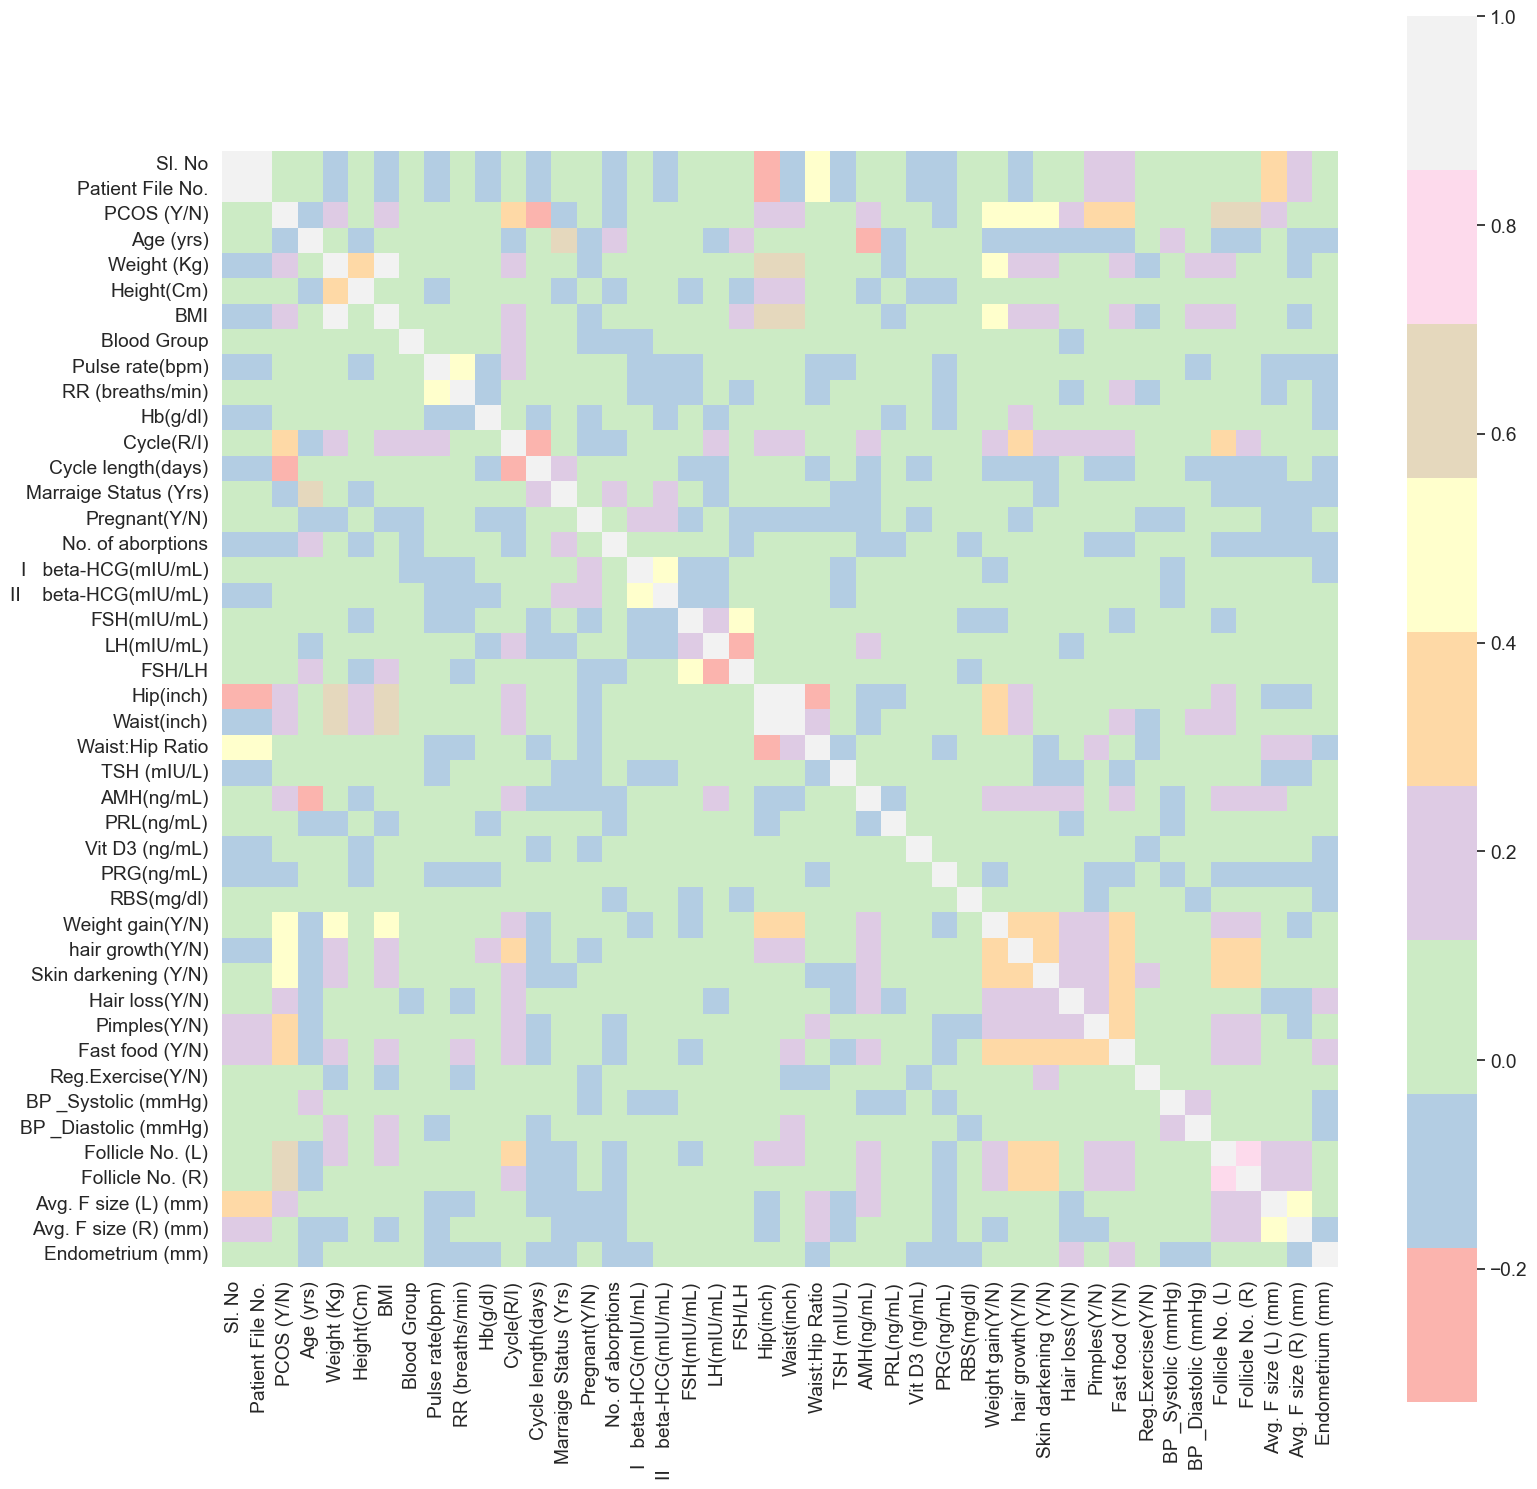

In [51]:
#Examaning a correlation matrix of all the features
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);


<AxesSubplot: >

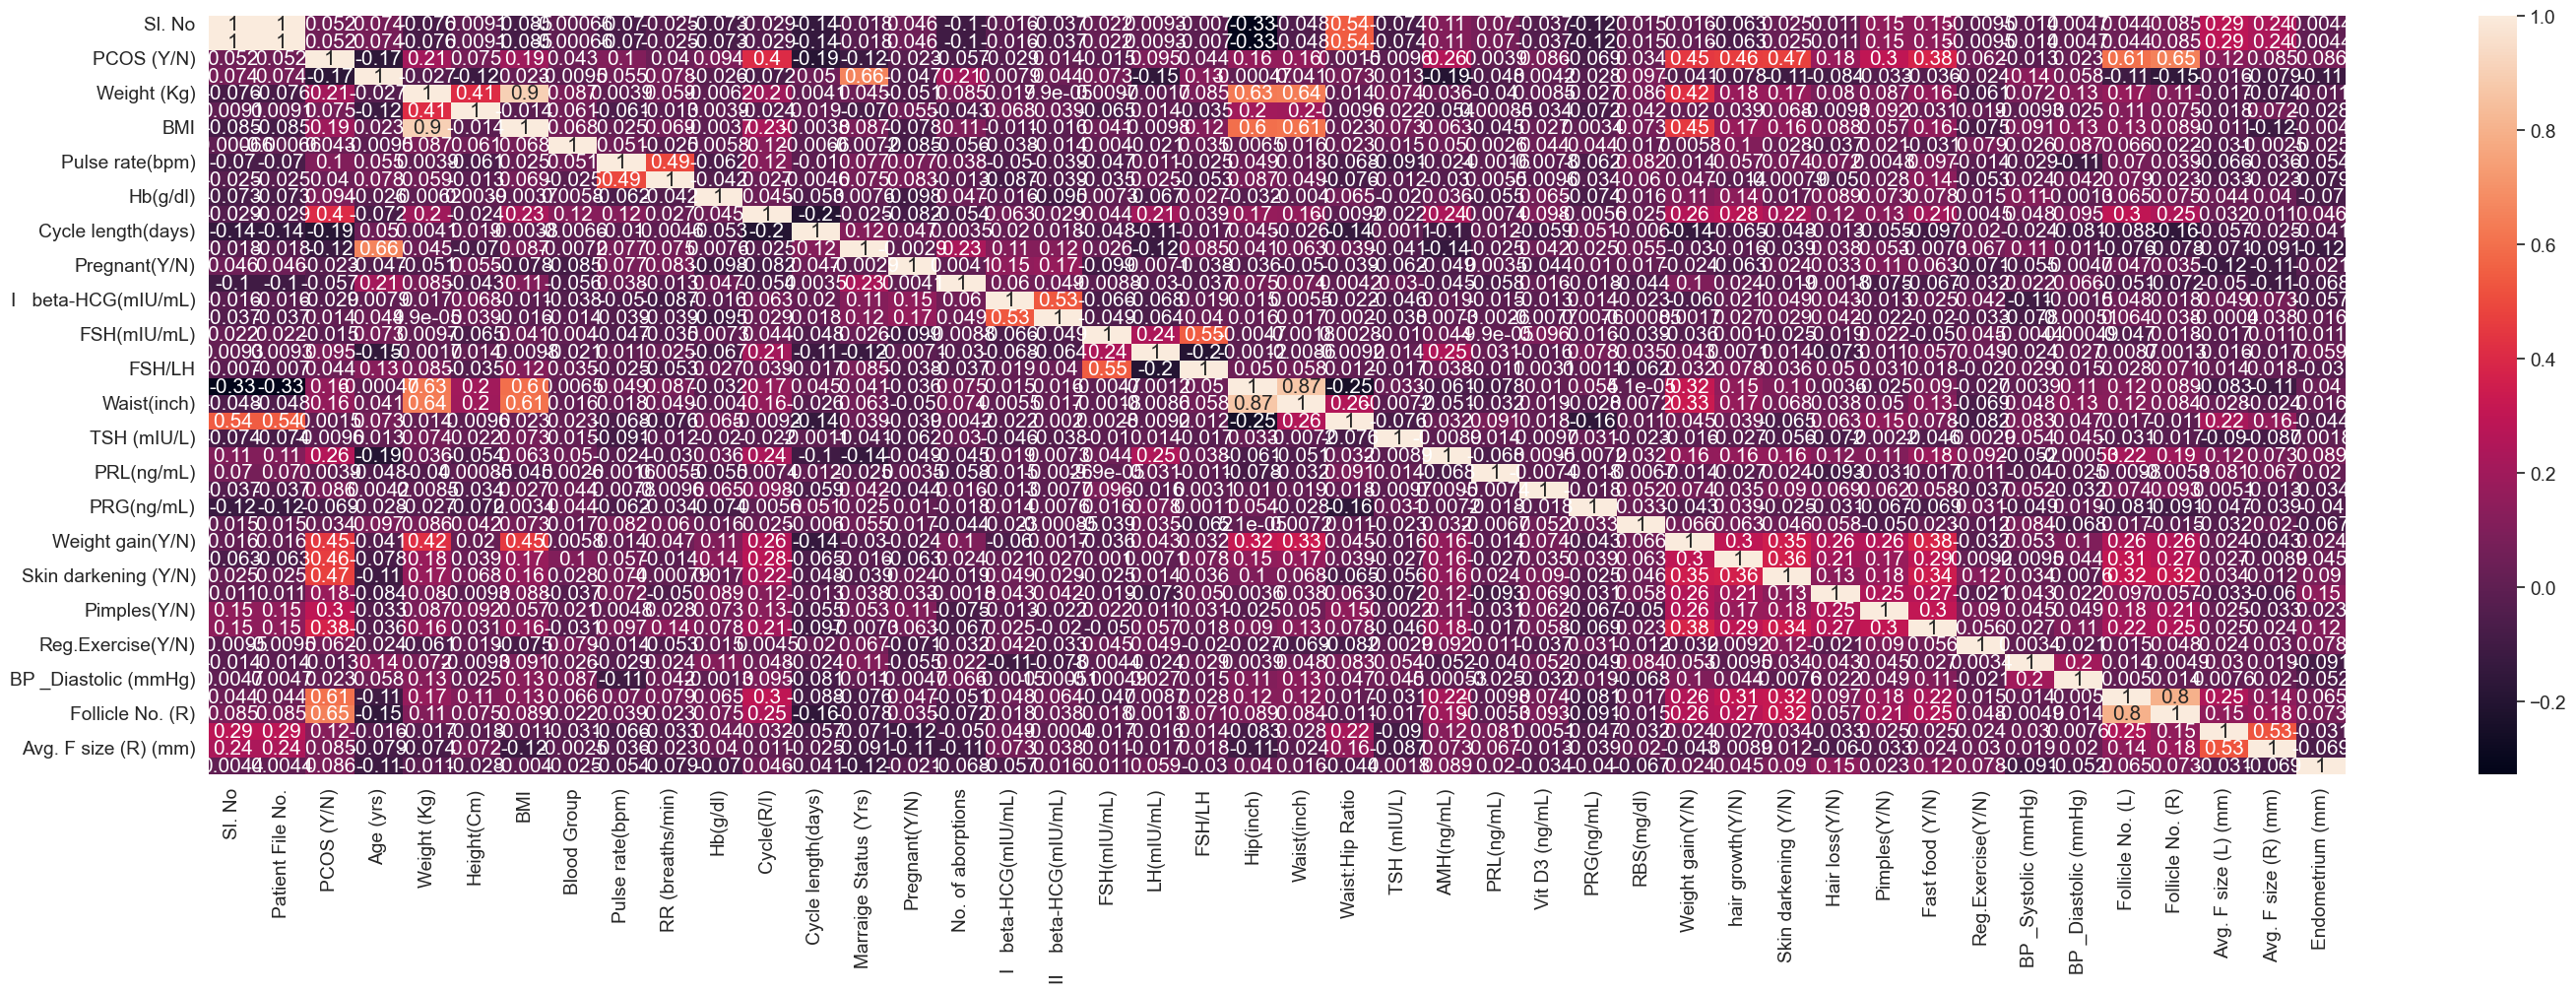

In [52]:
#Examaning a correlation matrix of all the features
corrmat = data.corr()
plt.figure(figsize=(35,10))
sns.heatmap(corrmat,annot=True)


In [53]:
#How all the features correlate with the PCOS
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.650915
Follicle No. (L)          0.605305
Skin darkening (Y/N)      0.474561
hair growth(Y/N)          0.463557
Weight gain(Y/N)          0.445646
Cycle(R/I)                0.404082
Fast food (Y/N)           0.376877
Pimples(Y/N)              0.295313
AMH(ng/mL)                0.261105
Weight (Kg)               0.210241
BMI                       0.194121
Hair loss(Y/N)            0.176603
Hip(inch)                 0.163335
Waist(inch)               0.160226
Avg. F size (L) (mm)      0.124990
Pulse rate(bpm)           0.102988
LH(mIU/mL)                0.095426
Hb(g/dl)                  0.094481
Vit D3 (ng/mL)            0.086052
Endometrium (mm)          0.085608
Avg. F size (R) (mm)      0.084756
Height(Cm)                0.075431
Reg.Exercise(Y/N)         0.061816
Sl. No                    0.051936
Patient File No.          0.051936
FSH/LH                    0.043591
Blood Group               0.043032
RR (breaths/min)    

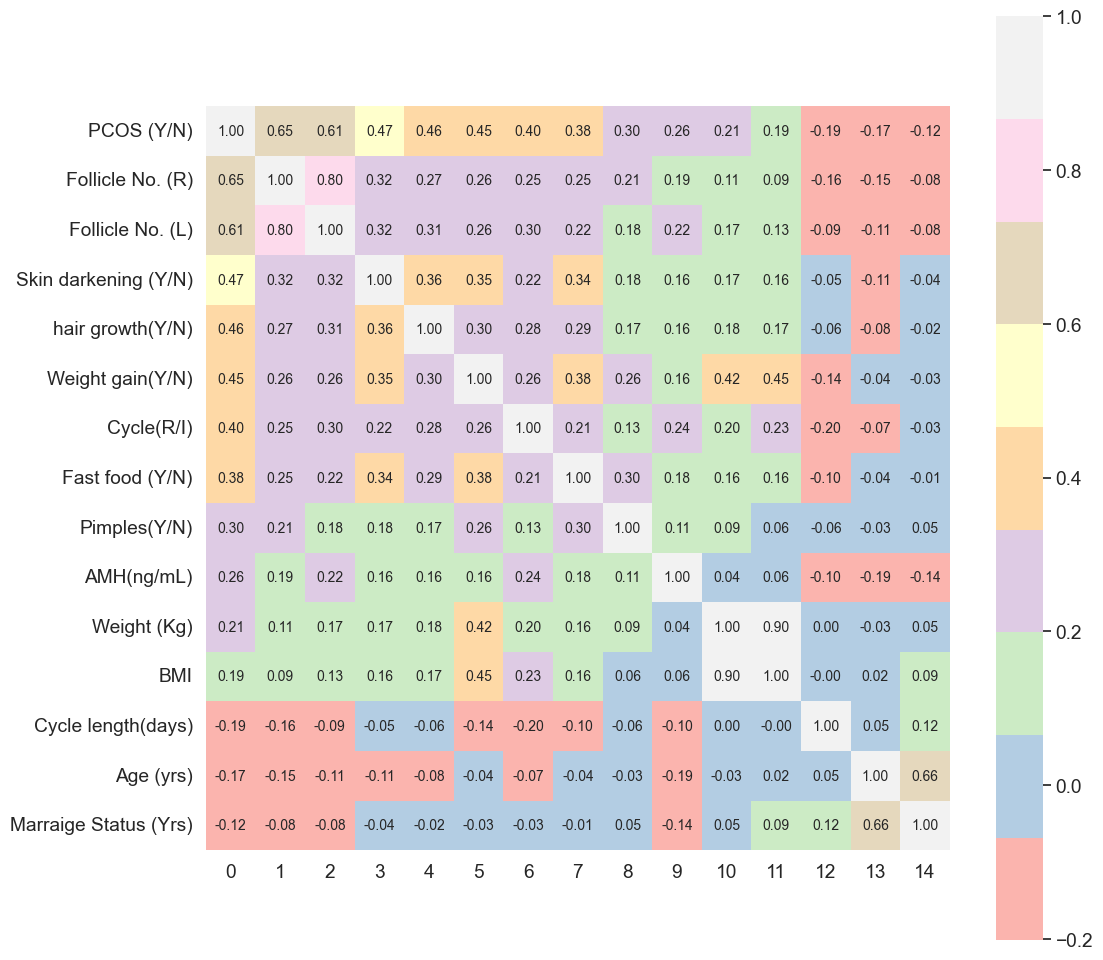

In [54]:
#Having a look at features bearing significant correlation
plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n)
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values)
plt.show()
                 

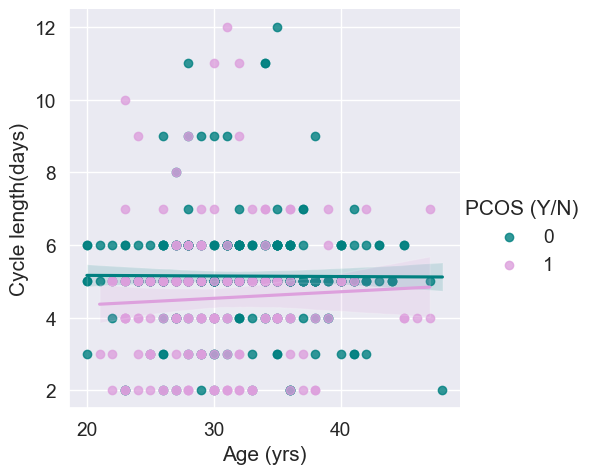

The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age


In [55]:
# Length of menstrual phase in PCOS vs normal
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)
print("The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age")

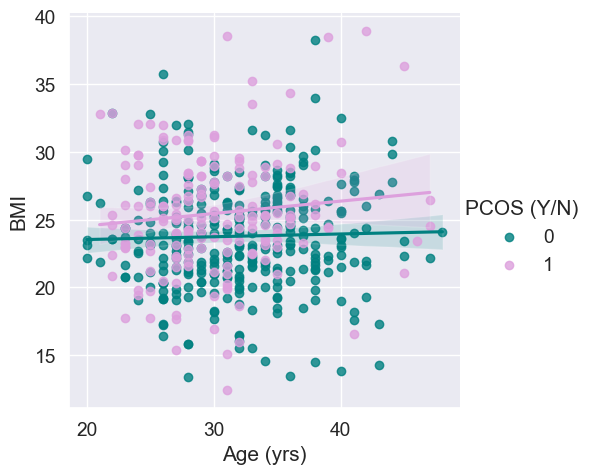

Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.


In [56]:
#Patterns Of BMI
# Pattern of weight gain (BMI) over years in PCOS and Normal.
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)
print("Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.")


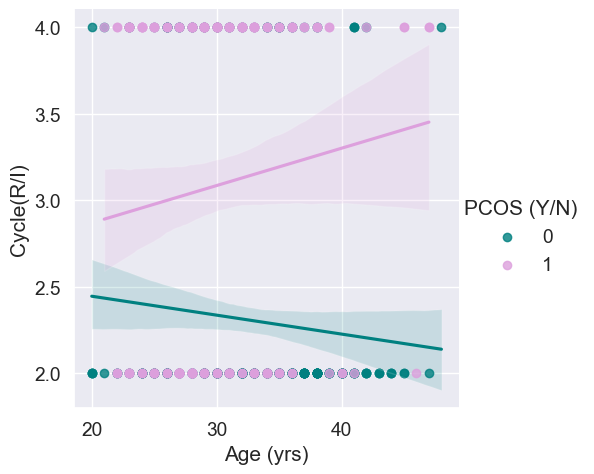

The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age


In [57]:
#Patterns Of Irregularity In Mensuration
#There is no clarity on what this feature and its values indicate but,
#Apparently in the feature "Cycle(R/I)" value:
#4 indicates irregular menstrual cycle
#2 indicates a regular menstrual cycle
# cycle IR wrt age
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()
print("The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age")

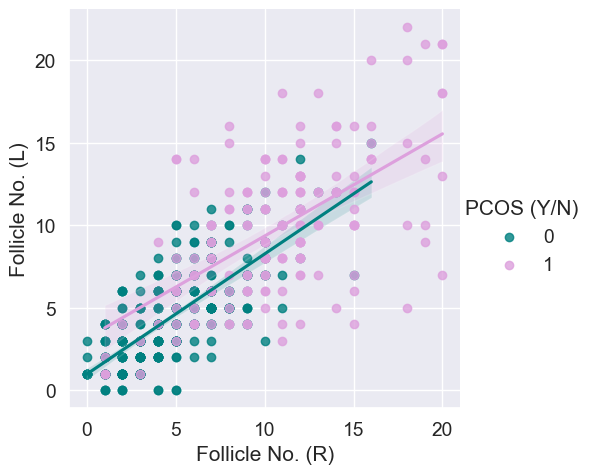

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the Normal patient. Thia iscurious let's exlore it with boxen plot


In [58]:
#Number Of Follicles
# Distribution of follicles in both ovaries.
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()
print("The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the Normal patient. Thia iscurious let's exlore it with boxen plot")


In [59]:
#Model Building
#Assiging the features (X)and target(y)
X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) #droping out index from features too
y=data["PCOS (Y/N)"]
#Splitting the data into test and training sets
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


In [60]:
X.columns

Index(['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')

In [61]:
X.shape

(526, 41)

In [62]:
#Fitting the Model
#Fitting a rather vanilla modle as base model
#Fitting the RandomForestClassifier to the training set
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
#Making prediction and checking the test set
pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.8544303797468354


In [64]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV
parameters = {
'n_estimators': [100,150, 200,500,700],
'max_depth' : [4,5,6,7,8,9,10,12],
'criterion' :['gini', 'entropy'],
'n_jobs':[-1,1,None]
}


In [65]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [66]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [67]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 83.54430379746836


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [69]:
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

c:\Users\91868\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [70]:
# Prediction
y_pred = clf.predict(X_test)

In [71]:
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 82.91139240506328


In [72]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [73]:
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9402173913043478
0.8670886075949367


In [74]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [76]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [77]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [78]:

print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [79]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [80]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.87%


In [81]:
# Creating the classifier object
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [82]:
y_pred = clf_gini.predict(X_test)
predictions=confusion_matrix(y_test, y_pred)
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Accuracy :  84.81012658227847


In [83]:
print("Report : ",classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.86      0.92      0.89       105
           1       0.82      0.70      0.76        53

    accuracy                           0.85       158
   macro avg       0.84      0.81      0.82       158
weighted avg       0.85      0.85      0.84       158



In [84]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
# Performing training
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [85]:
# Prediction using entropy
y_pred = clf_entropy.predict(X_test)
predictions=confusion_matrix(y_test, y_pred)
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Accuracy :  82.91139240506328


In [86]:
# Define a new data point as a Pandas dataframe 
# from sklearn.preprocessing import StandardScaler
new_data = pd.DataFrame( {'Age (yrs)':[28], 'Weight (Kg)':[44.6],
       'Height(Cm)':[152], 'BMI':[19.3], 'Blood Group':[15], 'Pulse rate(bpm)':[78],
       'RR (breaths/min)':[22], 'Hb(g/dl)':[10.48], 'Cycle(R/I)':[2], 'Cycle length(days)':[5],
       'Marraige Status (Yrs)':[7], 'Pregnant(Y/N)':[0], 'No. of aborptions':[0],
       'I   beta-HCG(mIU/mL)':[1.99], 'II    beta-HCG(mIU/mL)':[1.99], 'FSH(mIU/mL)':[7.95],
       'LH(mIU/mL)':[3.68], 'FSH/LH':2.160326087, 'Hip(inch)':[36], 'Waist(inch)':[30], 'Waist:Hip Ratio':[0.833333333],
       'TSH (mIU/L)':[0.68], 'AMH(ng/mL)':[2.07], 'PRL(ng/mL)':[45.16], 'Vit D3 (ng/mL)':[17.1],
       'PRG(ng/mL)':[0.57], 'RBS(mg/dl)':[92], 'Weight gain(Y/N)':[0], 'hair growth(Y/N)':[0],
       'Skin darkening (Y/N)':[0], 'Hair loss(Y/N)':[0], 'Pimples(Y/N)':[0],
       'Fast food (Y/N)':[1], 'Reg.Exercise(Y/N)':[0], 'BP _Systolic (mmHg)':[110],
       'BP _Diastolic (mmHg)':[80], 'Follicle No. (L)':[3], 'Follicle No. (R)':[3],
       'Avg. F size (L) (mm)':[18],'Avg. F size (R) (mm)':[18],  'Endometrium (mm)':[8.5]})

# Preprocess the new data point using the same scaler used for the training data
# new_data_scaled = Scaler.transform(new_data)

# Use the trained model to predict the class label for the new data point
predicted_class = model.predict(new_data)
# new_data.shape
# Print the predicted class label
print(predicted_class)

[0]
